In [42]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('Nike with sentiment + IBM - resource_01_with_sentiment.csv')

In [45]:
def assign(x):
    if x <= -0.4:
        return -1
    elif -0.3 <= x <= 0.3:
        return 0
    elif x >= 0.4:
        return 1

In [46]:
print(df["y_pred_google"])

0      0.6
1     -0.5
2     -0.3
3      0.0
4     -0.3
      ... 
385    0.2
386    0.0
387    0.0
388    0.0
389    0.1
Name: y_pred_google, Length: 390, dtype: float64


In [47]:
print(df["y_pred_ibm"])

0      0.000000
1     -0.947617
2     -0.925652
3      0.000000
4     -0.942135
         ...   
385    0.000000
386    0.000000
387    0.000000
388    0.000000
389    0.704654
Name: y_pred_ibm, Length: 390, dtype: float64


In [48]:
df["y_pred_ibm"]=df["y_pred_ibm"].round(1)

In [49]:
df["y_pred_google_binary"] = df["y_pred_google"].apply(assign)

In [50]:
df["y_pred_ibm_binary"] = df["y_pred_ibm"].apply(assign)

In [51]:
print(df)

                                                  text  y_pred_google  \
0    RT @lovesickdoe: this kuromi nike design goes ...            0.6   
1                 @issaspamho1 these fights b so sad 😹           -0.5   
2    RT @Fuuckray: This was in Dallas, bro threw a ...           -0.3   
3    RT @badestoutfit: tyler the creator x nike col...            0.0   
4    @SamMet54 @jordiecowley @classicshirts Chelsea...           -0.3   
..                                                 ...            ...   
385  RT @suz_classic_kit: NIKE AIR ZOOM SEASON\n\nT...            0.2   
386  RT @badestoutfit: tyler the creator x nike col...            0.0   
387  【Stock information】NIKE "FLIGHT ONE NRG" 【5205...            0.0   
388  RT @angelisnotpapi: rt for the full vid #nsfwt...            0.0   
389  Ad:  AIR JORDAN 6 RETRO\nWhite/Midnight Navy\n...            0.1   

     y_pred_ibm  y_true  y_pred_google_binary  y_pred_ibm_binary  
0           0.0       1                     1           

In [52]:
import seaborn as sns

In [53]:
sns.set(style="darkgrid")

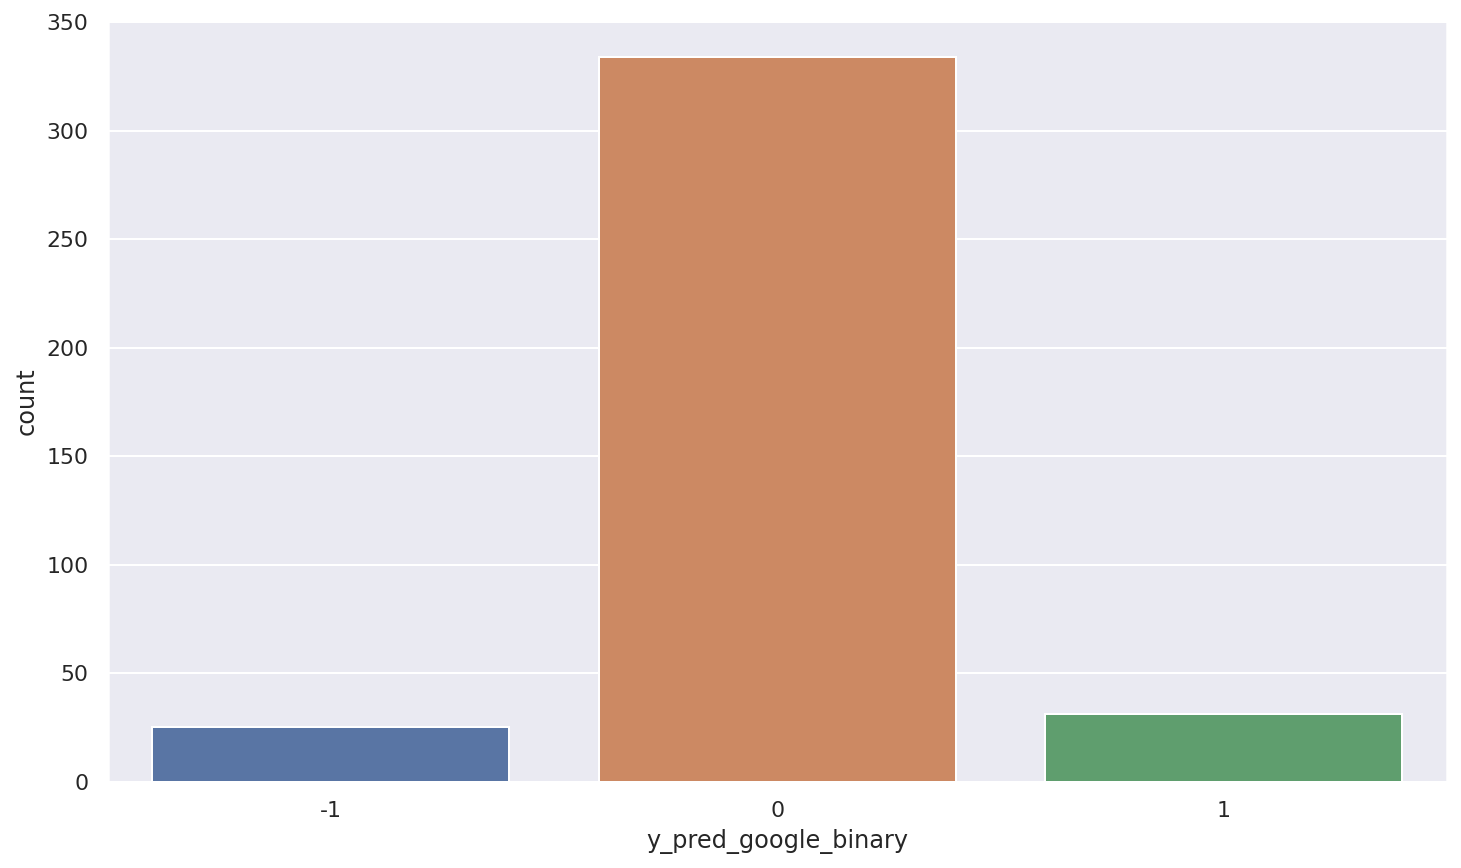

In [54]:
ax = sns.countplot(x=df["y_pred_google_binary"], data=df)

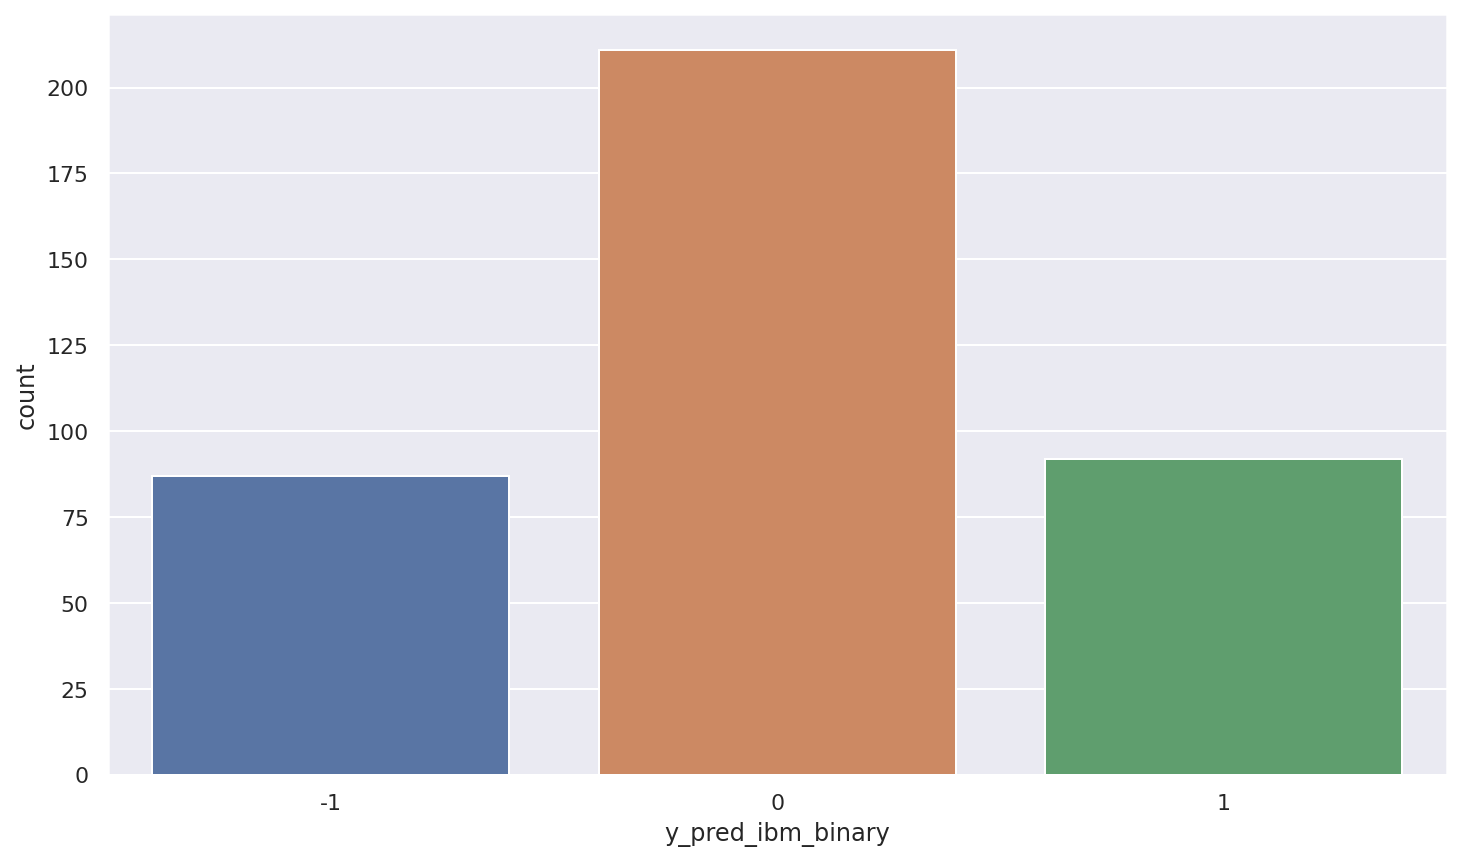

In [55]:
ax = sns.countplot(x=df["y_pred_ibm_binary"], data=df)

In [56]:
df["y_pred_google_binary"].value_counts()

 0    334
 1     31
-1     25
Name: y_pred_google_binary, dtype: int64

In [57]:
df["y_pred_ibm_binary"].value_counts()

 0    211
 1     92
-1     87
Name: y_pred_ibm_binary, dtype: int64

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
# Google

In [60]:
accuracy_score(df["y_true"], df["y_pred_google_binary"])

0.6897435897435897

In [61]:
from sklearn.metrics import recall_score

In [62]:
recall_score(df["y_true"], df["y_pred_google_binary"], average='weighted')

0.6897435897435897

In [63]:
from sklearn.metrics import f1_score

In [64]:
f1_score(df["y_true"], df["y_pred_google_binary"], average='weighted')

0.6393059993806206

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(df["y_true"], df["y_pred_google_binary"])

array([[ 16,  27,   1],
       [  6, 227,   4],
       [  3,  80,  26]])

<AxesSubplot: >

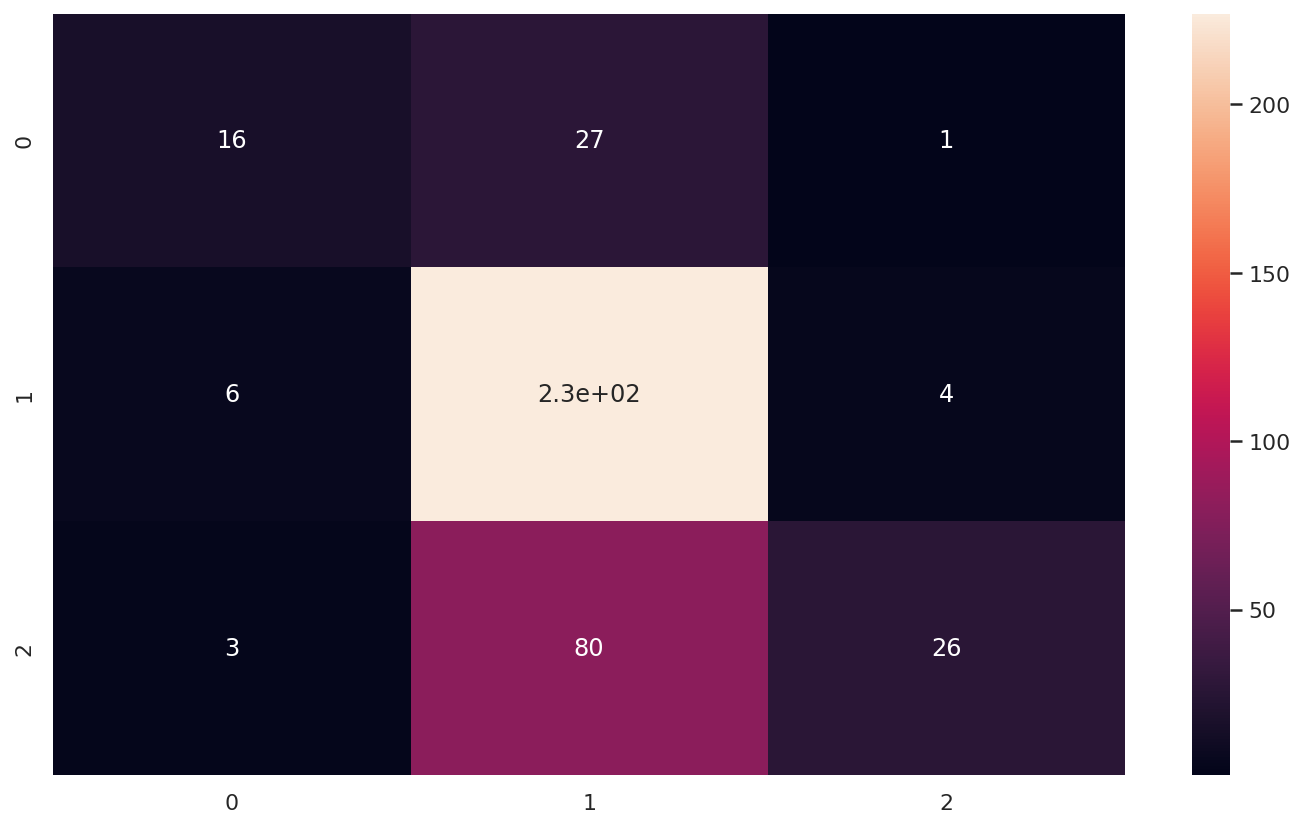

In [67]:
import seaborn as sns
sns.heatmap(confusion_matrix(df["y_true"], df["y_pred_google_binary"]), annot=True)

In [68]:
# IBM

In [69]:
accuracy_score(df["y_true"], df["y_pred_ibm_binary"])

0.617948717948718

In [70]:
recall_score(df["y_true"], df["y_pred_ibm_binary"], average='weighted')

0.617948717948718

In [71]:
f1_score(df["y_true"], df["y_pred_ibm_binary"], average='weighted')

0.6270923822468341

In [73]:
confusion_matrix(df["y_true"], df["y_pred_ibm_binary"])

array([[ 30,  10,   4],
       [ 26, 167,  44],
       [ 31,  34,  44]])

<AxesSubplot: >

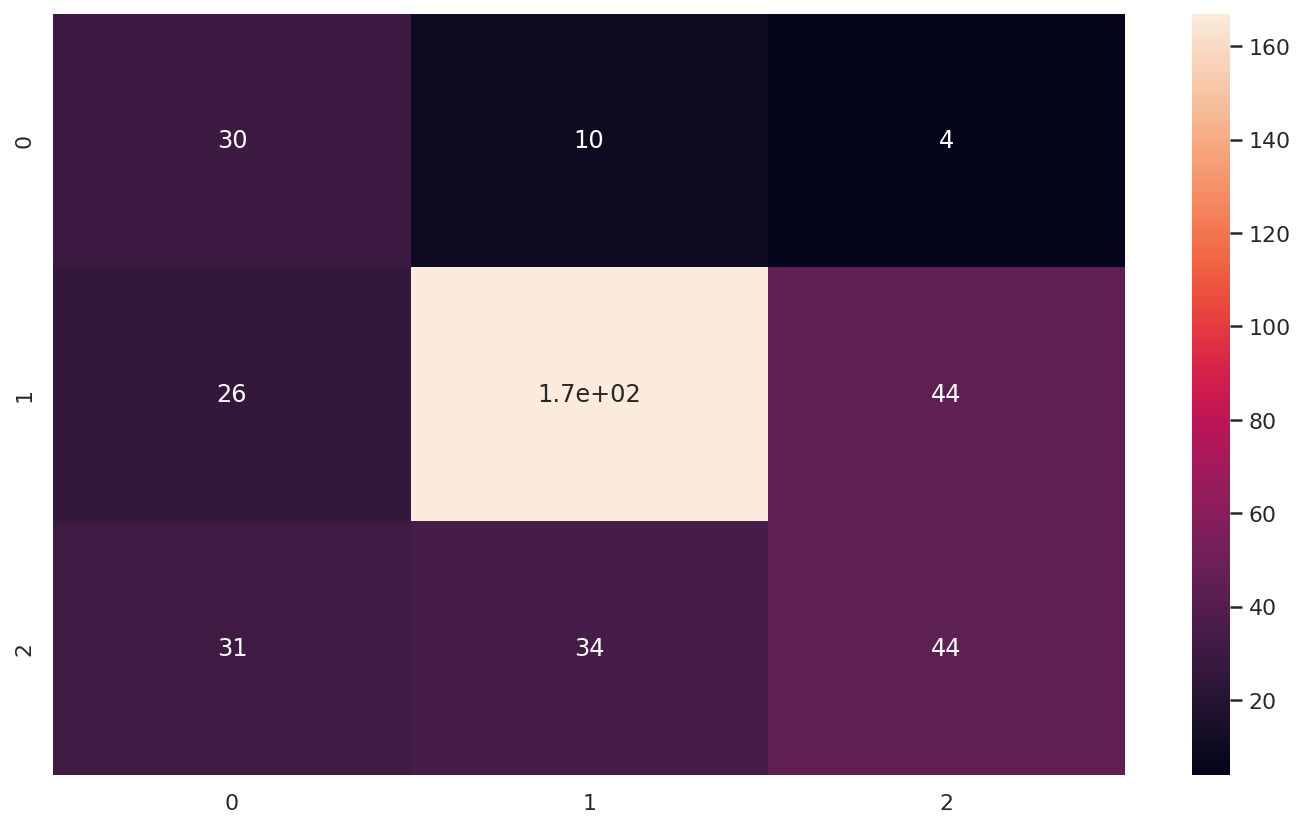

In [74]:
sns.heatmap(confusion_matrix(df["y_true"], df["y_pred_ibm_binary"]), annot=True)